In [6]:
# 기존 데이터를 학습하고 예측된 데이터를 함께 시각화하는 코드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

## 1번시료

In [7]:
use_df_10 = pd.read_csv('sim/camera_10.csv', parse_dates=['_time'], index_col='_time')
use_df_10

,_value
_time,
2024-09-28 00:00:00+09:00,35.532
2024-09-28 00:00:05+09:00,35.548
2024-09-28 00:00:10+09:00,35.548
2024-09-28 00:00:15+09:00,35.476
2024-09-28 00:00:20+09:00,35.436
...,...
2024-09-29 23:59:35+09:00,34.778
2024-09-29 23:59:40+09:00,34.710
2024-09-29 23:59:45+09:00,34.738


#### 데이터 압축(5초->60초)

In [8]:
# 30초 간격으로 그룹화하여 통계값 계산
max_reduced10 = use_df_10.resample('60S').max()
max_reduced10

,_value
_time,
2024-09-28 00:00:00+09:00,35.548
2024-09-28 00:01:00+09:00,35.638
2024-09-28 00:02:00+09:00,35.636
2024-09-28 00:03:00+09:00,35.682
2024-09-28 00:04:00+09:00,35.640
...,...
2024-09-29 23:55:00+09:00,34.762
2024-09-29 23:56:00+09:00,34.710
2024-09-29 23:57:00+09:00,34.718


#### 이상구간 추가 28일 10:30 ~ 14  29일 12:30 ~ 14

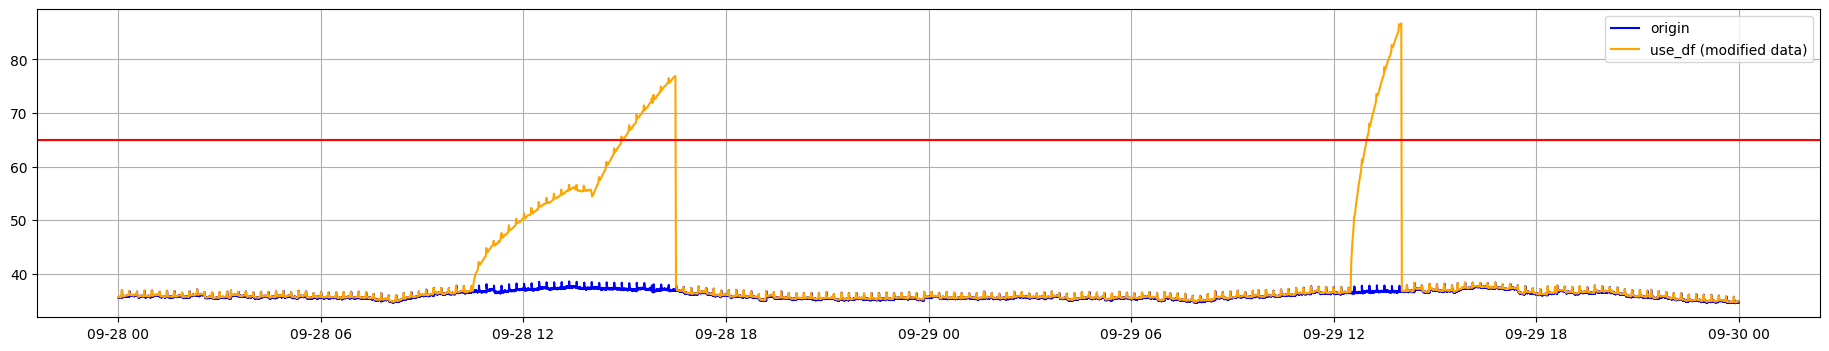

In [9]:
######이상데이터 1
# 첫 번째 구간: 천천히 증가
start_time_1 = '2024-09-28 10:30:00+09:00'
end_time_1 = '2024-09-28 14:00:00+09:00'
selected_data_1 = max_reduced10.loc[start_time_1:end_time_1]
increment_values_1 = np.sqrt(np.linspace(0, 1, len(selected_data_1))) * 20
max_reduced10.loc[start_time_1:end_time_1, '_value'] = selected_data_1['_value'].values + increment_values_1

# 두 번째 구간: 빠른 증가
start_time_2 = '2024-09-28 13:30:00+09:00'
end_time_2 = '2024-09-28 16:30:00+09:00'
selected_data_2 = max_reduced10.loc[start_time_2:end_time_2]
increment_values_2 = np.sqrt(np.linspace(0, 1, len(selected_data_2))) * 40
max_reduced10.loc[start_time_2:end_time_2, '_value'] = selected_data_2['_value'].values + increment_values_2

# 특정 구간에서 값을 자연스럽게 줄이기
adjust_start_time = '2024-09-28 13:30:00+09:00'
adjust_end_time = '2024-09-28 14:00:00+09:00'
selected_adjust_data = max_reduced10.loc[adjust_start_time:adjust_end_time]

# 자연스럽게 줄이기: 선형적으로 줄어들도록 조정
decrement_values = np.sqrt(np.linspace(0, 1, len(selected_adjust_data))) * 18
max_reduced10.loc[adjust_start_time:adjust_end_time, '_value'] = selected_adjust_data['_value'].values - decrement_values



######이상데이터 2
start_time_3 = '2024-09-29 12:30:00+09:00'
end_time_3 = '2024-09-29 14:00:00+09:00'
selected_data_3 = max_reduced10.loc[start_time_3:end_time_3]
increment_values_3 = np.sqrt(np.linspace(0, 1, len(selected_data_3))) * 50
max_reduced10.loc[start_time_3:end_time_3, '_value'] = selected_data_3['_value'].values + increment_values_3



# 결과를 시각화
plt.figure(figsize=(23, 4))
plt.plot(use_df_10.index, use_df_10, label='origin', color='blue')
plt.plot(max_reduced10.index, max_reduced10['_value'], label='use_df (modified data)', color='orange')
plt.axhline(65,color='red')
plt.grid()
plt.legend()
plt.show()


#### Test구간 설정

In [ ]:
# time_ranges 리스트에 지정된 시간 구간
time_ranges = [
    ('2024-09-28 00:00:00+09:00', '2024-09-28 01:05:00+09:00'),
    ('2024-09-28 04:00:00+09:00', '2024-09-28 05:05:00+09:00'),
    ('2024-09-28 12:00:00+09:00', '2024-09-28 13:05:00+09:00'),
    ('2024-09-28 14:30:00+09:00', '2024-09-28 15:35:00+09:00'),
    ('2024-09-28 16:00:00+09:00', '2024-09-28 17:05:00+09:00'),
    ('2024-09-28 23:00:00+09:00', '2024-09-29 00:05:00+09:00'),
    ('2024-09-29 05:00:00+09:00', '2024-09-29 06:05:00+09:00'),
    ('2024-09-29 12:00:00+09:00', '2024-09-29 13:05:00+09:00'),
    ('2024-09-29 13:30:00+09:00', '2024-09-29 14:35:00+09:00'),
    ('2024-09-29 19:00:00+09:00', '2024-09-29 20:05:00+09:00')
]


# 그래프 그리기
plt.figure(figsize=(23, 4))
plt.plot(use_df_10.index, use_df_10['_value'], label='use_df_10 (original data)', color='blue')
plt.plot(max_reduced10.index, max_reduced10['_value'], label='use_df (original data)', color='orange')

# 각 time_range의 시작과 끝에 수직선을 그리기
for start, end in time_ranges:
    start_time = pd.to_datetime(start)
    end_time = pd.to_datetime(end)
    
    # 시작 시간에 수직선
    plt.axvline(x=start_time, color='green', linestyle='--', label=f'Start: {start}')
    # 끝 시간에 수직선
    plt.axvline(x=end_time, color='red', linestyle='--', label=f'End: {end}')
plt.axhline(65, color='red')
plt.grid()
plt.show()

In [17]:
## 평지구간 5개, 증가구간 3개(2개알람), 급감소구간 2개

#### Test기간 5분씩 테스트 후 알람확인

In [20]:
results = []

# 각 시간 범위에 대해 슬라이딩 예측 수행
for time_range in time_ranges:
    start_time, end_time = time_range
    start_time = pd.Timestamp(start_time)
    
    # 5번의 슬라이딩 예측 수행
    for i in range(5):  # 총 5번 예측
        train_start = start_time + pd.Timedelta(minutes=i)  # 시작 시간
        train_end = train_start + pd.Timedelta(hours=1)  # 1시간 후
        
        train_window = max_reduced10.loc[train_start:train_end]  # 해당 시간 구간의 데이터
        
        # ARIMA 모델 학습
        model = ARIMA(train_window, order=(12, 2, 6))
        model_fit = model.fit()
        
        # 30분 예측
        forecast = model_fit.forecast(steps=30)
        forecast_df = pd.DataFrame(forecast)
        forecast_transpose = forecast_df.T
        forecast_transpose.index = [forecast_transpose.columns[0]]
        forecast_transpose.columns = range(len(forecast_transpose.columns))
        forecast_transpose['alarm'] = (forecast_transpose.iloc[0] > 65).any()
        
        results.append(forecast_transpose)

# 결과를 하나의 데이터프레임으로 합치기
results_df = pd.concat(results)
# final_alarm 열 생성
results_df['final_alarm'] = False

# 시간대 그룹핑 및 final_alarm 업데이트
time_bins = pd.date_range(start=results_df.index.min(), end=results_df.index.max(), freq='5T')  # 5분 단위로 그룹핑
for start_time in time_bins:
    end_time = start_time + pd.Timedelta(minutes=5)
    mask = (results_df.index >= start_time) & (results_df.index < end_time)
    
    if mask.any():  # 그룹에 데이터가 있는 경우
        if results_df.loc[mask, 'alarm'].all():  # 모든 alarm이 True인 경우
            results_df.loc[mask, 'final_alarm'] = True

selected_indices = results_df[results_df['final_alarm']==True].index[(results_df[results_df['final_alarm']==True]['final_alarm'] == True) & ((results_df[results_df['final_alarm']==True].index.minute % 10 == 1) | (results_df[results_df['final_alarm']==True].index.minute % 10 == 5))]
selected_indices

DatetimeIndex(['2024-09-28 15:31:00+09:00', '2024-09-28 15:35:00+09:00',
               '2024-09-29 13:01:00+09:00', '2024-09-29 13:05:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq=None)

#### 알람나오는 구간 확인

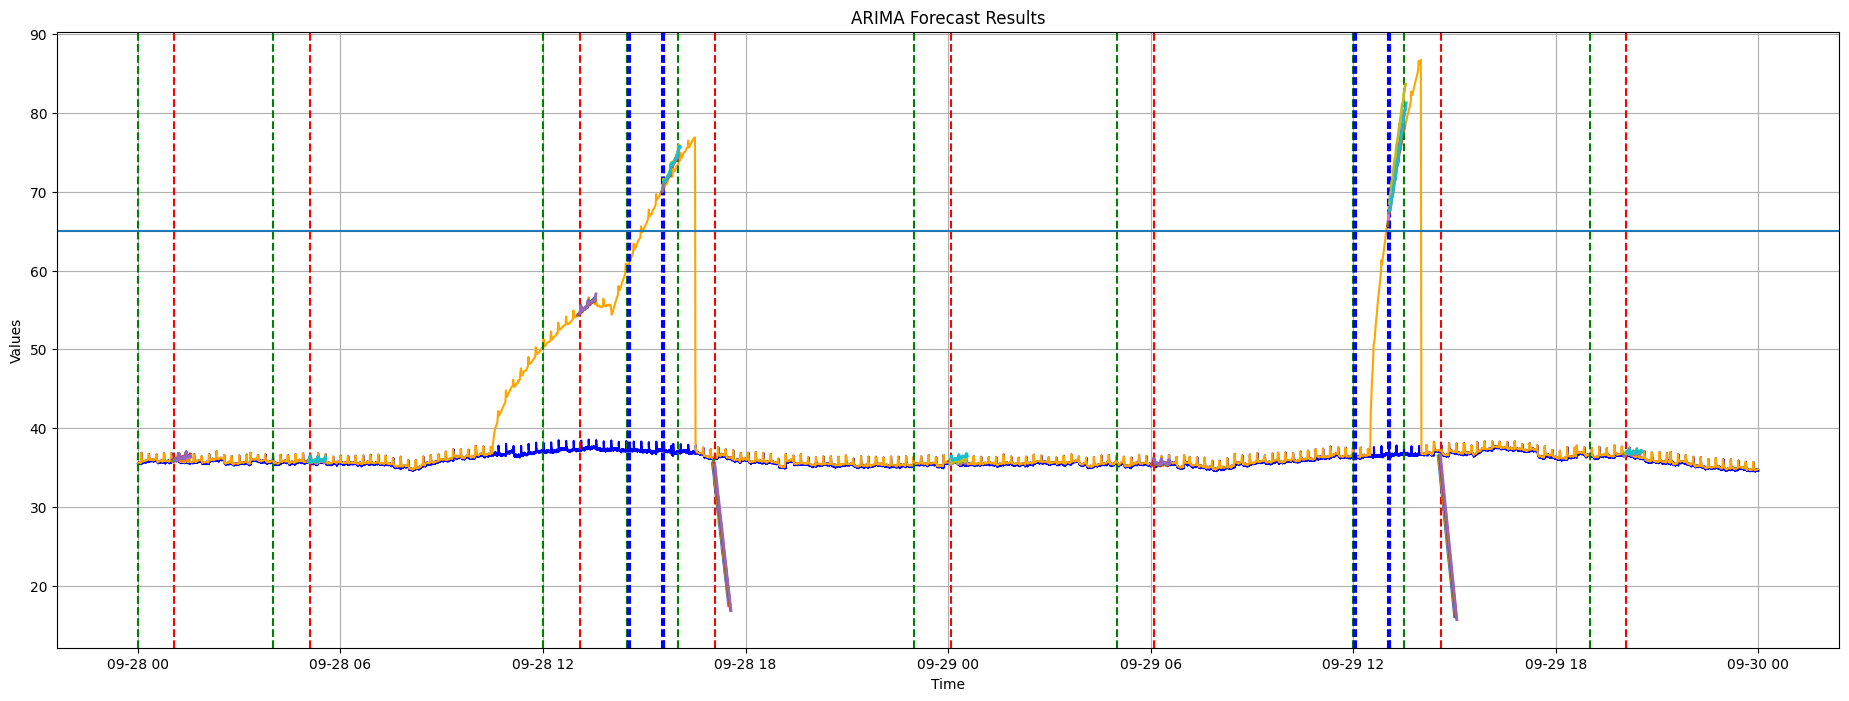

In [21]:
# 그래프 그리기
plt.figure(figsize=(23, 8))
plt.plot(use_df_10.index, use_df_10['_value'], label='use_df_10 (original data)', color='blue')
plt.plot(max_reduced10.index, max_reduced10['_value'], label='max_reduced10 (original data)', color='orange')

# 각 time_range의 시작과 끝에 수직선을 그리기
for start, end in time_ranges:
    start_time = pd.to_datetime(start)
    end_time = pd.to_datetime(end)
    
    # 시작 시간에 수직선
    plt.axvline(x=start_time, color='green', linestyle='--', label=f'Start: {start}')
    # 끝 시간에 수직선
    plt.axvline(x=end_time, color='red', linestyle='--', label=f'End: {end}')

#알람이 울린 구간 확인
for i in selected_indices:
    alarm_time = pd.to_datetime(i)
    plt.axvline(alarm_time, color='blue', linestyle='--')
    plt.axvline(alarm_time - pd.Timedelta(hours=1), color='blue', linestyle='--')  # 1시간 전 시간


# 예측 결과 플로팅
for i, result in enumerate(results):
    forecast_start_time = result.index[0]  # 예측 시작 시간
    forecast_values = result.iloc[0, :-1]  # 예측된 값 (마지막 열은 'alarm'임)
    forecast_index = pd.date_range(start=forecast_start_time, periods=len(forecast_values), freq='T')
    
    plt.plot(forecast_index, forecast_values, label=f'Forecast {i + 1}', linestyle='-', linewidth=2)

plt.axhline(65)
plt.grid()
plt.title('ARIMA Forecast Results')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()


#### 결과 추출

In [22]:
results_df.iloc[:,-1:].to_csv('result/camera_10_result.csv')

## 2번시료

In [23]:
use_df_11 = pd.read_csv('sim/camera_11.csv', parse_dates=['_time'], index_col='_time')
max_reduced11 = use_df_11.resample('60S').max()[:-1]

#### 이상구간 추가 28일 09:30 ~ 15:30   29일 13:30 ~ 14:15

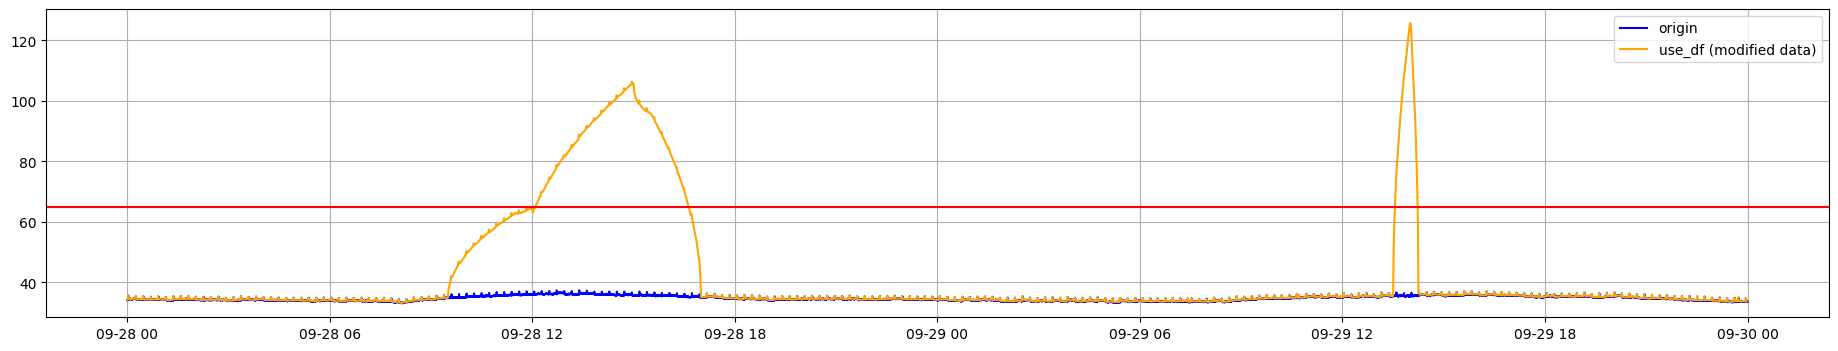

In [25]:
######이상데이터 1
# 첫 번째 구간: 천천히 증가
start_time_1 = '2024-09-28 09:30:00+09:00'
end_time_1 = '2024-09-28 12:00:00+09:00'
selected_data_1 = max_reduced11.loc[start_time_1:end_time_1]
increment_values_1 = np.sqrt(np.linspace(0, 1, len(selected_data_1))) * 30
max_reduced11.loc[start_time_1:end_time_1, '_value'] = selected_data_1['_value'].values + increment_values_1

# 두 번째 구간: 빠른 증가
start_time_2 = '2024-09-28 11:30:00+09:00'
end_time_2 = '2024-09-28 15:30:00+09:00'
selected_data_2 = max_reduced11.loc[start_time_2:end_time_2]
increment_values_2 = np.sqrt(np.linspace(0, 1, len(selected_data_2))) * 75
max_reduced11.loc[start_time_2:end_time_2, '_value'] = selected_data_2['_value'].values + increment_values_2

# 특정 구간에서 값을 자연스럽게 줄이기
adjust_start_time = '2024-09-28 11:30:00+09:00'
adjust_end_time = '2024-09-28 12:00:00+09:00'
selected_adjust_data = max_reduced11.loc[adjust_start_time:adjust_end_time]
# 자연스럽게 줄이기: 선형적으로 줄어들도록 조정
decrement_values = np.sqrt(np.linspace(0, 1, len(selected_adjust_data))) * 28
max_reduced11.loc[adjust_start_time:adjust_end_time, '_value'] = selected_adjust_data['_value'].values - decrement_values


# 세 번째 구간: 빠른 하락
start_time_3 = '2024-09-28 15:30:05+09:00'
end_time_3 = '2024-09-28 17:00:00+09:00'
selected_data_3 = max_reduced11.loc[start_time_3:end_time_3]
increment_values_3 = np.sqrt(np.linspace(1, 0, len(selected_data_3))) * 60
max_reduced11.loc[start_time_3:end_time_3, '_value'] = selected_data_3['_value'].values + increment_values_3

# 특정 구간에서 값을 자연스럽게 줄이기
adjust_start_time = '2024-09-28 15:00:00+09:00'
adjust_end_time = '2024-09-28 15:30:00+09:00'
selected_adjust_data = max_reduced11.loc[adjust_start_time:adjust_end_time]
# 자연스럽게 줄이기: 선형적으로 줄어들도록 조정
decrement_values = np.sqrt(np.linspace(0, 1, len(selected_adjust_data))) * 15
max_reduced11.loc[adjust_start_time:adjust_end_time, '_value'] = selected_adjust_data['_value'].values - decrement_values



######이상데이터 2증가
start_time_3 = '2024-09-29 13:30:00+09:00'
end_time_3 = '2024-09-29 14:00:00+09:00'
selected_data_3 = max_reduced11.loc[start_time_3:end_time_3]
increment_values_3 = np.sqrt(np.linspace(0, 1, len(selected_data_3))) * 90
max_reduced11.loc[start_time_3:end_time_3, '_value'] = selected_data_3['_value'].values + increment_values_3

######이상데이터 2감소
start_time_3 = '2024-09-29 14:00:05+09:00'
end_time_3 = '2024-09-29 14:15:00+09:00'
selected_data_3 = max_reduced11.loc[start_time_3:end_time_3]
increment_values_3 = np.sqrt(np.linspace(1, 0, len(selected_data_3))) * 90
max_reduced11.loc[start_time_3:end_time_3, '_value'] = selected_data_3['_value'].values + increment_values_3



# 결과를 시각화
plt.figure(figsize=(23, 4))
plt.plot(use_df_11.index, use_df_11, label='origin', color='blue')
plt.plot(max_reduced11.index, max_reduced11['_value'], label='use_df (modified data)', color='orange')
plt.axhline(65,color='red')
plt.grid()
plt.legend()
plt.show()


#### Test구간 설정

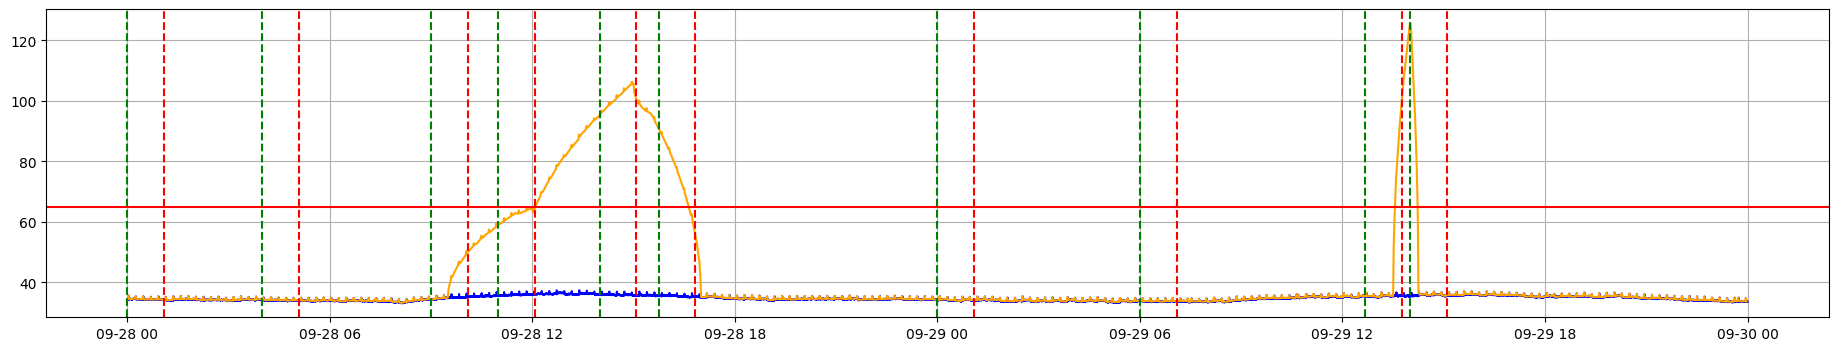

In [26]:
# time_ranges 리스트에 지정된 시간 구간
time_ranges = [
    ('2024-09-28 00:00:00+09:00', '2024-09-28 01:05:00+09:00'),
    ('2024-09-28 04:00:00+09:00', '2024-09-28 05:05:00+09:00'),
    ('2024-09-28 09:00:00+09:00', '2024-09-28 10:05:00+09:00'),
    ('2024-09-28 11:00:00+09:00', '2024-09-28 12:05:00+09:00'),
    ('2024-09-28 14:00:00+09:00', '2024-09-28 15:05:00+09:00'),
    ('2024-09-28 15:45:00+09:00', '2024-09-28 16:50:00+09:00'),
    ('2024-09-29 00:00:00+09:00', '2024-09-29 01:05:00+09:00'),
    ('2024-09-29 06:00:00+09:00', '2024-09-29 07:05:00+09:00'),
    ('2024-09-29 12:40:00+09:00', '2024-09-29 13:45:00+09:00'),
    ('2024-09-29 14:00:00+09:00', '2024-09-29 15:05:00+09:00')
]


# 그래프 그리기
plt.figure(figsize=(23, 4))
plt.plot(use_df_11.index, use_df_11['_value'], label='use_df_11 (original data)', color='blue')
plt.plot(max_reduced11.index, max_reduced11['_value'], label='use_df (original data)', color='orange')

# 각 time_range의 시작과 끝에 수직선을 그리기
for start, end in time_ranges:
    start_time = pd.to_datetime(start)
    end_time = pd.to_datetime(end)
    
    # 시작 시간에 수직선
    plt.axvline(x=start_time, color='green', linestyle='--', label=f'Start: {start}')
    # 끝 시간에 수직선
    plt.axvline(x=end_time, color='red', linestyle='--', label=f'End: {end}')
plt.axhline(65,color='red')
plt.grid()
plt.show()

In [27]:
## 평지구간 4개, 증가구간 4개(2개만 알람되야함), 감소구간 2개

#### Test기간 5분씩 테스트 후 알람확인

In [28]:
results = []

# 각 시간 범위에 대해 슬라이딩 예측 수행
for time_range in time_ranges:
    start_time, end_time = time_range
    start_time = pd.Timestamp(start_time)
    
    # 5번의 슬라이딩 예측 수행
    for i in range(5):  # 총 5번 예측
        train_start = start_time + pd.Timedelta(minutes=i)  # 시작 시간
        train_end = train_start + pd.Timedelta(hours=1)  # 1시간 후
        
        train_window = max_reduced11.loc[train_start:train_end]  # 해당 시간 구간의 데이터
        
        # ARIMA 모델 학습
        model = ARIMA(train_window, order=(12, 2, 6))
        model_fit = model.fit()
        
        # 30분 예측
        forecast = model_fit.forecast(steps=30)
        forecast_df = pd.DataFrame(forecast)
        forecast_transpose = forecast_df.T
        forecast_transpose.index = [forecast_transpose.columns[0]]
        forecast_transpose.columns = range(len(forecast_transpose.columns))
        forecast_transpose['alarm'] = (forecast_transpose.iloc[0] > 65).any()
        
        results.append(forecast_transpose)

# 결과를 하나의 데이터프레임으로 합치기
results_df = pd.concat(results)
# final_alarm 열 생성
results_df['final_alarm'] = False

# 시간대 그룹핑 및 final_alarm 업데이트
time_bins = pd.date_range(start=results_df.index.min(), end=results_df.index.max(), freq='5T')  # 5분 단위로 그룹핑
for start_time in time_bins:
    end_time = start_time + pd.Timedelta(minutes=5)
    mask = (results_df.index >= start_time) & (results_df.index < end_time)
    
    if mask.any():  # 그룹에 데이터가 있는 경우
        if results_df.loc[mask, 'alarm'].all():  # 모든 alarm이 True인 경우
            results_df.loc[mask, 'final_alarm'] = True

selected_indices = results_df[results_df['final_alarm']==True].index[(results_df[results_df['final_alarm']==True]['final_alarm'] == True) & ((results_df[results_df['final_alarm']==True].index.minute % 10 == 1) | (results_df[results_df['final_alarm']==True].index.minute % 10 == 5))]
selected_indices

DatetimeIndex(['2024-09-28 15:01:00+09:00', '2024-09-28 15:05:00+09:00',
               '2024-09-29 13:41:00+09:00', '2024-09-29 13:45:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq=None)

#### 알람나오는 구간 확인

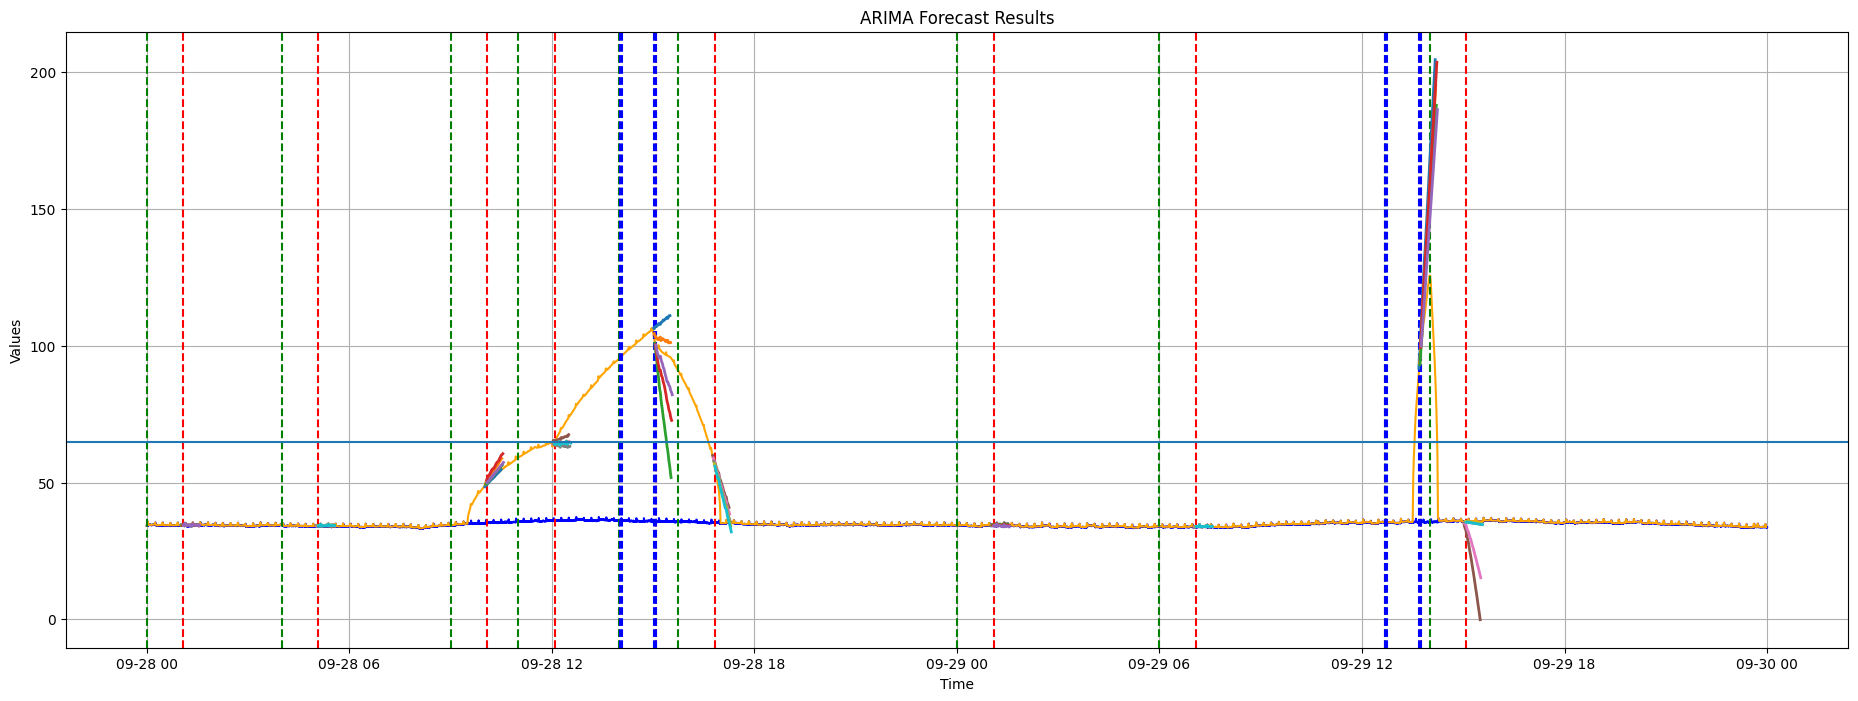

In [29]:
# 그래프 그리기
plt.figure(figsize=(23, 8))
plt.plot(use_df_11.index, use_df_11['_value'], label='use_df_11 (original data)', color='blue')
plt.plot(max_reduced11.index, max_reduced11['_value'], label='max_reduced11 (original data)', color='orange')

# 각 time_range의 시작과 끝에 수직선을 그리기
for start, end in time_ranges:
    start_time = pd.to_datetime(start)
    end_time = pd.to_datetime(end)
    
    # 시작 시간에 수직선
    plt.axvline(x=start_time, color='green', linestyle='--', label=f'Start: {start}')
    # 끝 시간에 수직선
    plt.axvline(x=end_time, color='red', linestyle='--', label=f'End: {end}')

#알람이 울린 구간 확인
for i in selected_indices:
    alarm_time = pd.to_datetime(i)
    plt.axvline(alarm_time, color='blue', linestyle='--')
    plt.axvline(alarm_time - pd.Timedelta(hours=1), color='blue', linestyle='--')  # 1시간 전 시간


# 예측 결과 플로팅
for i, result in enumerate(results):
    forecast_start_time = result.index[0]  # 예측 시작 시간
    forecast_values = result.iloc[0, :-1]  # 예측된 값 (마지막 열은 'alarm'임)
    forecast_index = pd.date_range(start=forecast_start_time, periods=len(forecast_values), freq='T')
    
    plt.plot(forecast_index, forecast_values, label=f'Forecast {i + 1}', linestyle='-', linewidth=2)

plt.axhline(65)
plt.grid()
plt.title('ARIMA Forecast Results')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()


#### 결과추출

In [30]:
results_df.iloc[:,-1:].to_csv('result/camera_11_result.csv')

## 3번시료

In [31]:
use_df_12 = pd.read_csv('sim/camera_12.csv', parse_dates=['_time'], index_col='_time')
max_reduced12 = use_df_12.resample('60S').max()[:-1]

#### 이상구간 추가 28일 08 ~ 29일 14:45

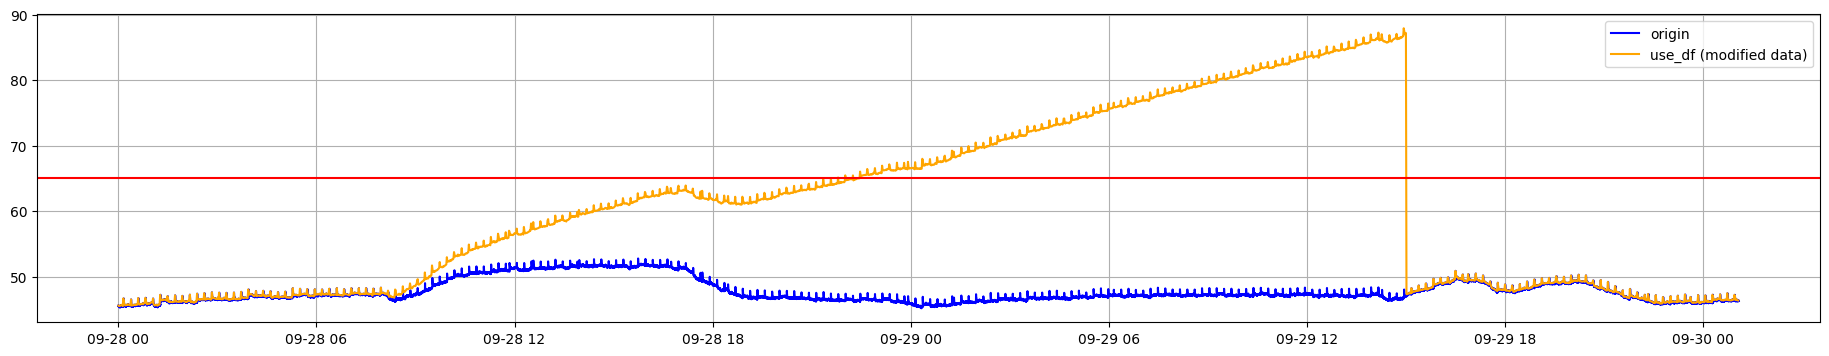

In [33]:
use_df_12 = df_12['2024-09-28 00:00:00+09:00':'2024-09-30 01:05:00+09:00']
max_reduced12 = use_df_12.resample('60S').max()[:-1]

start_time = '2024-09-28 08:00:10+09:00'
end_time = '2024-09-29 15:00:00+09:00'
selected_data = max_reduced12.loc[start_time:end_time]
increment_values = np.linspace(0, 40, len(selected_data))
max_reduced12.loc[start_time:end_time, '_value'] = selected_data['_value'].values + increment_values


# 결과를 시각화
plt.figure(figsize=(23, 4))
plt.plot(use_df_12.index, use_df_12, label='origin', color='blue')
plt.plot(max_reduced12.index, max_reduced12['_value'], label='use_df (modified data)', color='orange')
plt.axhline(65,color='red')
plt.grid()
plt.legend()
plt.show()


#### Test구간 설정

In [34]:
## 평지구간 3개, 증가구간 7개(4개만 알람되야함)

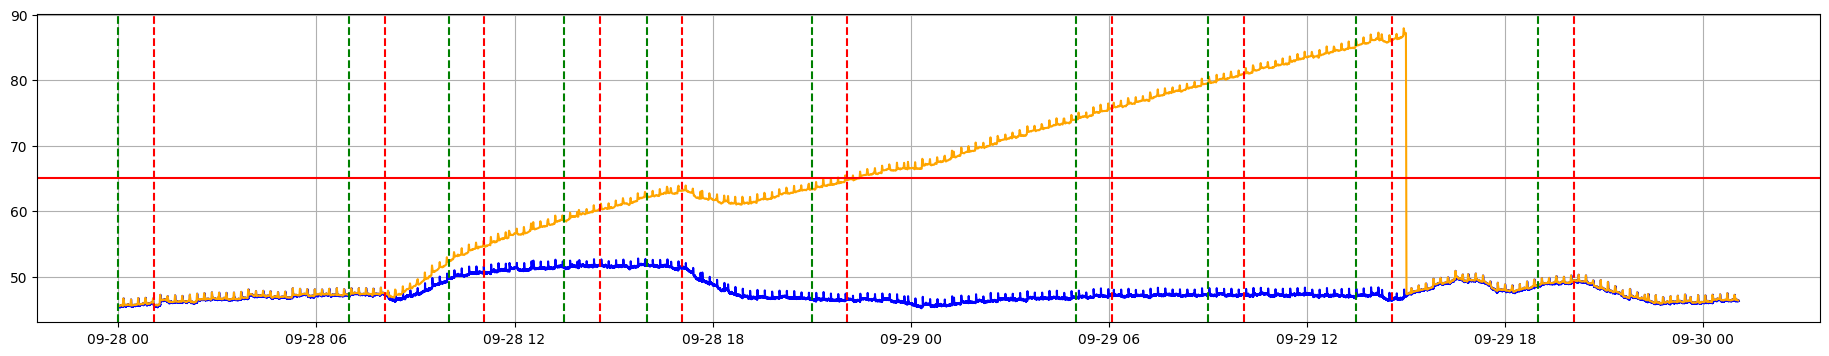

In [35]:
# time_ranges 리스트에 지정된 시간 구간
time_ranges = [
    ('2024-09-28 00:00:00+09:00', '2024-09-28 01:05:00+09:00'),
    ('2024-09-28 07:00:00+09:00', '2024-09-28 08:05:00+09:00'),
    ('2024-09-28 10:00:00+09:00', '2024-09-28 11:05:00+09:00'),
    ('2024-09-28 13:30:00+09:00', '2024-09-28 14:35:00+09:00'),
    ('2024-09-28 16:00:00+09:00', '2024-09-28 17:05:00+09:00'),
    ('2024-09-28 21:00:00+09:00', '2024-09-28 22:05:00+09:00'),
    ('2024-09-29 05:00:00+09:00', '2024-09-29 06:05:00+09:00'),
    ('2024-09-29 09:00:00+09:00', '2024-09-29 10:05:00+09:00'),
    ('2024-09-29 13:30:00+09:00', '2024-09-29 14:35:00+09:00'),
    ('2024-09-29 19:00:00+09:00', '2024-09-29 20:05:00+09:00')
]


# 그래프 그리기
plt.figure(figsize=(23, 4))
plt.plot(use_df_12.index, use_df_12['_value'], label='use_df_12 (original data)', color='blue')
plt.plot(max_reduced12.index, max_reduced12['_value'], label='use_df (original data)', color='orange')

# 각 time_range의 시작과 끝에 수직선을 그리기
for start, end in time_ranges:
    start_time = pd.to_datetime(start)
    end_time = pd.to_datetime(end)
    
    # 시작 시간에 수직선
    plt.axvline(x=start_time, color='green', linestyle='--', label=f'Start: {start}')
    # 끝 시간에 수직선
    plt.axvline(x=end_time, color='red', linestyle='--', label=f'End: {end}')
plt.axhline(65,color='red')
plt.grid()
plt.show()

#### Test기간 5분씩 테스트 후 알람확인

In [36]:
results = []

# 각 시간 범위에 대해 슬라이딩 예측 수행
for time_range in time_ranges:
    start_time, end_time = time_range
    start_time = pd.Timestamp(start_time)
    
    # 5번의 슬라이딩 예측 수행
    for i in range(5):  # 총 5번 예측
        train_start = start_time + pd.Timedelta(minutes=i)  # 시작 시간
        train_end = train_start + pd.Timedelta(hours=1)  # 1시간 후
        
        train_window = max_reduced12.loc[train_start:train_end]  # 해당 시간 구간의 데이터
        
        # ARIMA 모델 학습
        model = ARIMA(train_window, order=(12, 2, 6))
        model_fit = model.fit()
        
        # 30분 예측
        forecast = model_fit.forecast(steps=30)
        forecast_df = pd.DataFrame(forecast)
        forecast_transpose = forecast_df.T
        forecast_transpose.index = [forecast_transpose.columns[0]]
        forecast_transpose.columns = range(len(forecast_transpose.columns))
        forecast_transpose['alarm'] = (forecast_transpose.iloc[0] > 65).any()
        
        results.append(forecast_transpose)

# 결과를 하나의 데이터프레임으로 합치기
results_df = pd.concat(results)
# final_alarm 열 생성
results_df['final_alarm'] = False

# 시간대 그룹핑 및 final_alarm 업데이트
time_bins = pd.date_range(start=results_df.index.min(), end=results_df.index.max(), freq='5T')  # 5분 단위로 그룹핑
for start_time in time_bins:
    end_time = start_time + pd.Timedelta(minutes=5)
    mask = (results_df.index >= start_time) & (results_df.index < end_time)
    
    if mask.any():  # 그룹에 데이터가 있는 경우
        if results_df.loc[mask, 'alarm'].all():  # 모든 alarm이 True인 경우
            results_df.loc[mask, 'final_alarm'] = True

selected_indices = results_df[results_df['final_alarm']==True].index[(results_df[results_df['final_alarm']==True]['final_alarm'] == True) & ((results_df[results_df['final_alarm']==True].index.minute % 10 == 1) | (results_df[results_df['final_alarm']==True].index.minute % 10 == 5))]
selected_indices

DatetimeIndex(['2024-09-28 22:01:00+09:00', '2024-09-28 22:05:00+09:00',
               '2024-09-29 06:01:00+09:00', '2024-09-29 06:05:00+09:00',
               '2024-09-29 10:01:00+09:00', '2024-09-29 10:05:00+09:00',
               '2024-09-29 14:31:00+09:00', '2024-09-29 14:35:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq=None)

#### 알람구간 확인

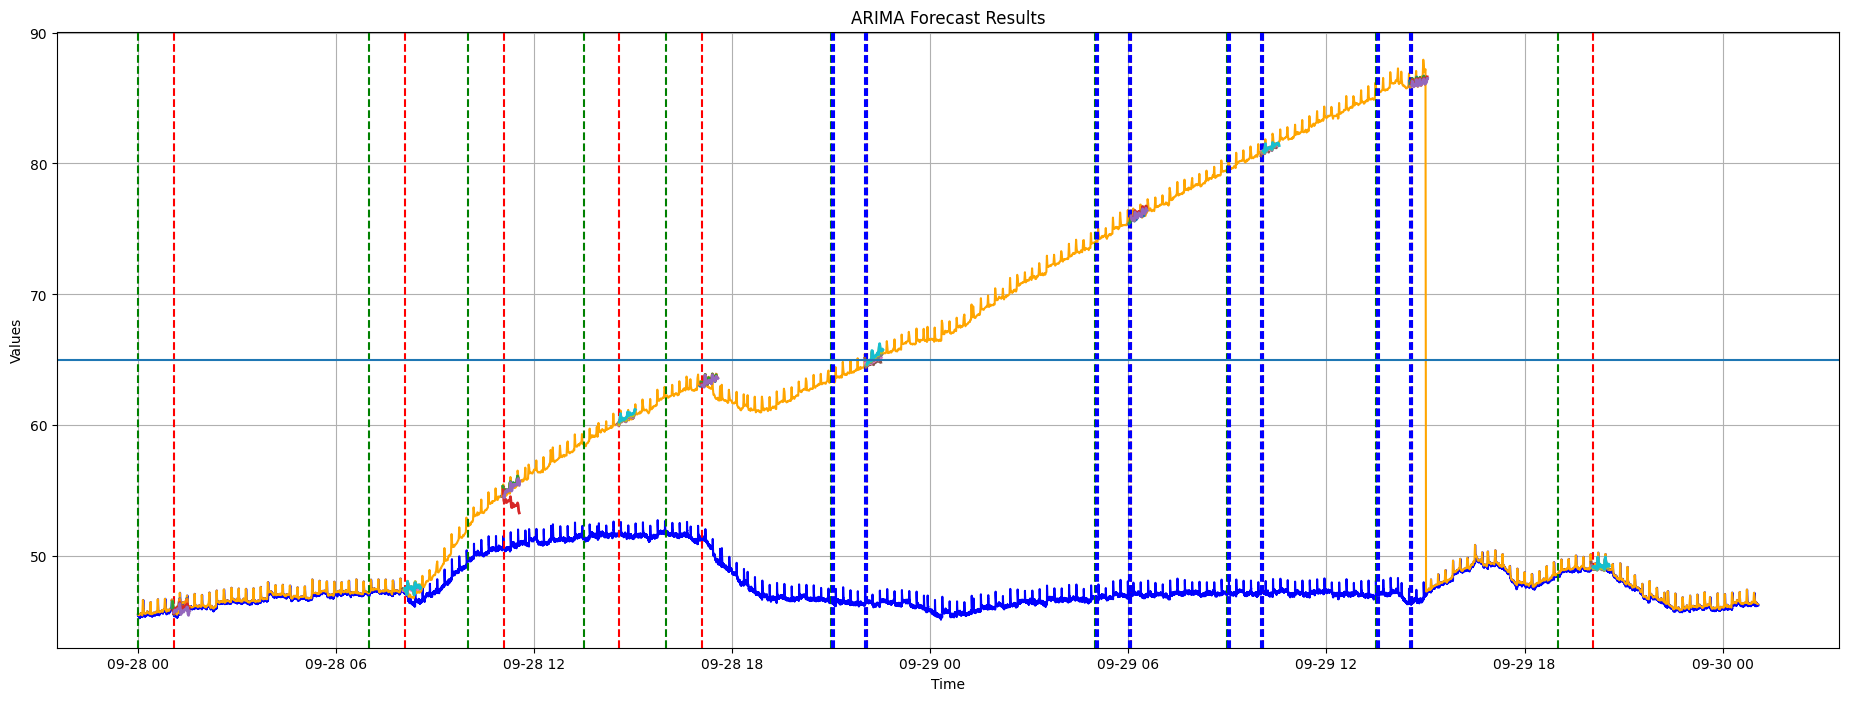

In [37]:
# 그래프 그리기
plt.figure(figsize=(23, 8))
plt.plot(use_df_12.index, use_df_12['_value'], label='use_df_12 (original data)', color='blue')
plt.plot(max_reduced12.index, max_reduced12['_value'], label='max_reduced12 (original data)', color='orange')

# 각 time_range의 시작과 끝에 수직선을 그리기
for start, end in time_ranges:
    start_time = pd.to_datetime(start)
    end_time = pd.to_datetime(end)
    
    # 시작 시간에 수직선
    plt.axvline(x=start_time, color='green', linestyle='--', label=f'Start: {start}')
    # 끝 시간에 수직선
    plt.axvline(x=end_time, color='red', linestyle='--', label=f'End: {end}')

#알람이 울린 구간 확인
for i in selected_indices:
    alarm_time = pd.to_datetime(i)
    plt.axvline(alarm_time, color='blue', linestyle='--')
    plt.axvline(alarm_time - pd.Timedelta(hours=1), color='blue', linestyle='--')  # 1시간 전 시간


# 예측 결과 플로팅
for i, result in enumerate(results):
    forecast_start_time = result.index[0]  # 예측 시작 시간
    forecast_values = result.iloc[0, :-1]  # 예측된 값 (마지막 열은 'alarm'임)
    forecast_index = pd.date_range(start=forecast_start_time, periods=len(forecast_values), freq='T')
    
    plt.plot(forecast_index, forecast_values, label=f'Forecast {i + 1}', linestyle='-', linewidth=2)

plt.axhline(65)
plt.grid()
plt.title('ARIMA Forecast Results')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()


#### 결과추출

In [38]:
results_df.iloc[:,-1:].to_csv('result/camera_12_result.csv')

## 4번시료

In [54]:
use_df_14 = pd.read_csv('sim/camera_14.csv', parse_dates=['_time'], index_col='_time')
max_reduced14 = use_df_14.resample('60S').max()[:-1]

#### 이상구간 추가 28일 13:30 ~ 19  29일 14:30 ~ 22

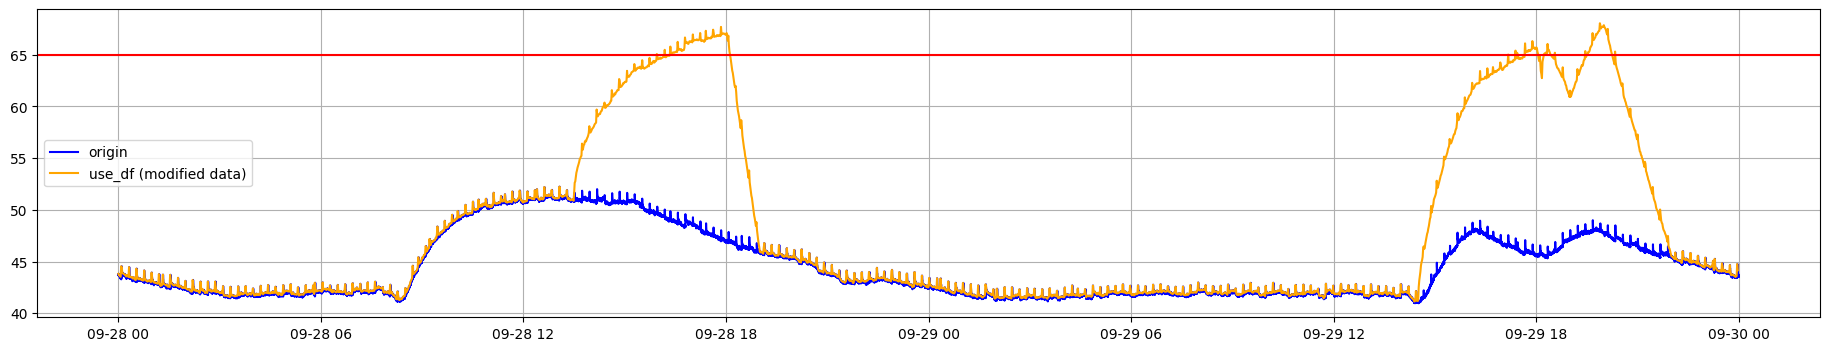

In [56]:
max_reduced14 = use_df_14.resample('60S').max()[:-1]
######이상데이터 1
start_time_1 = '2024-09-28 13:30:00+09:00'
end_time_1 = '2024-09-28 18:00:00+09:00'
selected_data_1 = max_reduced14.loc[start_time_1:end_time_1]
increment_values_1 = np.sqrt(np.linspace(0, 1, len(selected_data_1))) * 20
max_reduced14.loc[start_time_1:end_time_1, '_value'] = selected_data_1['_value'].values + increment_values_1

start_time_2 = '2024-09-28 18:00:14+09:00'
end_time_2 = '2024-09-28 19:00:14+09:00'
selected_data_2 = max_reduced14.loc[start_time_2:end_time_2]
increment_values = np.linspace(20, 0, len(selected_data_2))
max_reduced14.loc[start_time_2:end_time_2, '_value'] = selected_data_2['_value'].values + increment_values



# ######이상데이터 2
start_time_3 = '2024-09-29 14:30:00+09:00'
end_time_3 = '2024-09-29 18:00:00+09:00'
selected_data_3 = max_reduced14.loc[start_time_3:end_time_3]
increment_values_3 = np.sqrt(np.linspace(0, 1, len(selected_data_3))) * 20
max_reduced14.loc[start_time_3:end_time_3, '_value'] = selected_data_3['_value'].values + increment_values_3

start_time_4 = '2024-09-29 18:00:14+09:00'
end_time_4 = '2024-09-29 19:00:14+09:00'
selected_data_4 = max_reduced14.loc[start_time_4:end_time_4]
increment_values_4 = np.linspace(20, 0, len(selected_data_4))
max_reduced14.loc[start_time_4:end_time_4, '_value'] = selected_data_4['_value'].values + increment_values_4

start_time_3 = '2024-09-29 18:10:00+09:00'
end_time_3 = '2024-09-29 20:00:00+09:00'
selected_data_3 = max_reduced14.loc[start_time_3:end_time_3]
increment_values_3 = np.sqrt(np.linspace(0, 1, len(selected_data_3))) * 20
max_reduced14.loc[start_time_3:end_time_3, '_value'] = selected_data_3['_value'].values + increment_values_3

start_time_4 = '2024-09-29 20:00:14+09:00'
end_time_4 = '2024-09-29 22:00:14+09:00'
selected_data_4 = max_reduced14.loc[start_time_4:end_time_4]
increment_values_4 = np.linspace(20, 0, len(selected_data_4))
max_reduced14.loc[start_time_4:end_time_4, '_value'] = selected_data_4['_value'].values + increment_values_4


# 결과를 시각화
plt.figure(figsize=(23, 4))
plt.plot(use_df_14.index, use_df_14, label='origin', color='blue')
plt.plot(max_reduced14.index, max_reduced14['_value'], label='use_df (modified data)', color='orange')
plt.axhline(65,color='red')
plt.grid()
plt.legend()
plt.show()


#### Test구간 설정

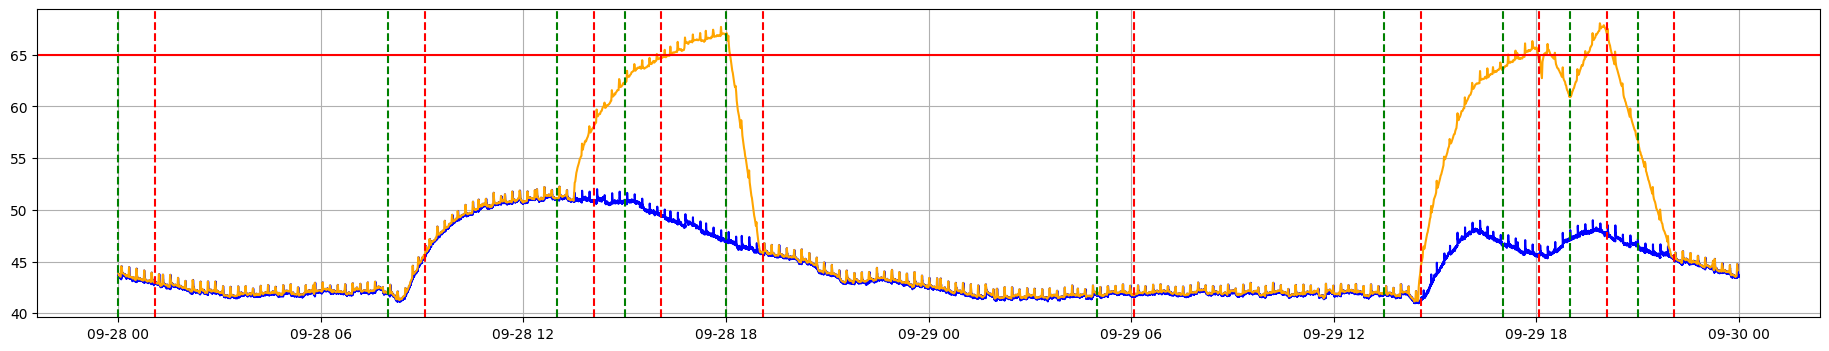

In [63]:
# time_ranges 리스트에 지정된 시간 구간
time_ranges = [
    ('2024-09-28 00:00:00+09:00', '2024-09-28 01:05:00+09:00'),
    ('2024-09-28 08:00:00+09:00', '2024-09-28 09:05:00+09:00'),
    ('2024-09-28 13:00:00+09:00', '2024-09-28 14:05:00+09:00'),
    ('2024-09-28 15:00:00+09:00', '2024-09-28 16:05:00+09:00'),
    ('2024-09-28 18:00:00+09:00', '2024-09-28 19:05:00+09:00'),
    ('2024-09-29 05:00:00+09:00', '2024-09-29 06:05:00+09:00'),
    ('2024-09-29 13:30:00+09:00', '2024-09-29 14:35:00+09:00'),
    ('2024-09-29 17:00:00+09:00', '2024-09-29 18:05:00+09:00'),
    ('2024-09-29 19:00:00+09:00', '2024-09-29 20:05:00+09:00'),
    ('2024-09-29 21:00:00+09:00', '2024-09-29 22:05:00+09:00'),
]


# 그래프 그리기
plt.figure(figsize=(23, 4))
plt.plot(use_df_14.index, use_df_14['_value'], label='use_df_14 (original data)', color='blue')
plt.plot(max_reduced14.index, max_reduced14['_value'], label='use_df (original data)', color='orange')

# 각 time_range의 시작과 끝에 수직선을 그리기
for start, end in time_ranges:
    start_time = pd.to_datetime(start)
    end_time = pd.to_datetime(end)
    
    # 시작 시간에 수직선
    plt.axvline(x=start_time, color='green', linestyle='--', label=f'Start: {start}')
    # 끝 시간에 수직선
    plt.axvline(x=end_time, color='red', linestyle='--', label=f'End: {end}')
plt.axhline(65, color='red')
plt.grid()
plt.show()

In [64]:
## 평지구간 3개, 증가구간 5개(3개만 알람되야함), 급감소구간 2개

#### Test기간 5분씩 테스트 후 알림확인

In [65]:
results = []

# 각 시간 범위에 대해 슬라이딩 예측 수행
for time_range in time_ranges:
    start_time, end_time = time_range
    start_time = pd.Timestamp(start_time)
    
    # 5번의 슬라이딩 예측 수행
    for i in range(5):  # 총 5번 예측
        train_start = start_time + pd.Timedelta(minutes=i)  # 시작 시간
        train_end = train_start + pd.Timedelta(hours=1)  # 1시간 후
        
        train_window = max_reduced14.loc[train_start:train_end]  # 해당 시간 구간의 데이터
        
        # ARIMA 모델 학습
        model = ARIMA(train_window, order=(12, 2, 6))
        model_fit = model.fit()
        
        # 30분 예측
        forecast = model_fit.forecast(steps=30)
        forecast_df = pd.DataFrame(forecast)
        forecast_transpose = forecast_df.T
        forecast_transpose.index = [forecast_transpose.columns[0]]
        forecast_transpose.columns = range(len(forecast_transpose.columns))
        forecast_transpose['alarm'] = (forecast_transpose.iloc[0] > 65).any()
        
        results.append(forecast_transpose)

# 결과를 하나의 데이터프레임으로 합치기
results_df = pd.concat(results)
# final_alarm 열 생성
results_df['final_alarm'] = False

# 시간대 그룹핑 및 final_alarm 업데이트
time_bins = pd.date_range(start=results_df.index.min(), end=results_df.index.max(), freq='5T')  # 5분 단위로 그룹핑
for start_time in time_bins:
    end_time = start_time + pd.Timedelta(minutes=5)
    mask = (results_df.index >= start_time) & (results_df.index < end_time)
    
    if mask.any():  # 그룹에 데이터가 있는 경우
        if results_df.loc[mask, 'alarm'].all():  # 모든 alarm이 True인 경우
            results_df.loc[mask, 'final_alarm'] = True

selected_indices = results_df[results_df['final_alarm']==True].index[(results_df[results_df['final_alarm']==True]['final_alarm'] == True) & ((results_df[results_df['final_alarm']==True].index.minute % 14 == 1) | (results_df[results_df['final_alarm']==True].index.minute % 14 == 5))]
selected_indices

DatetimeIndex(['2024-09-28 16:01:00+09:00', '2024-09-28 16:05:00+09:00',
               '2024-09-29 18:01:00+09:00', '2024-09-29 18:05:00+09:00',
               '2024-09-29 20:01:00+09:00', '2024-09-29 20:05:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq=None)

#### 알람구간 확인

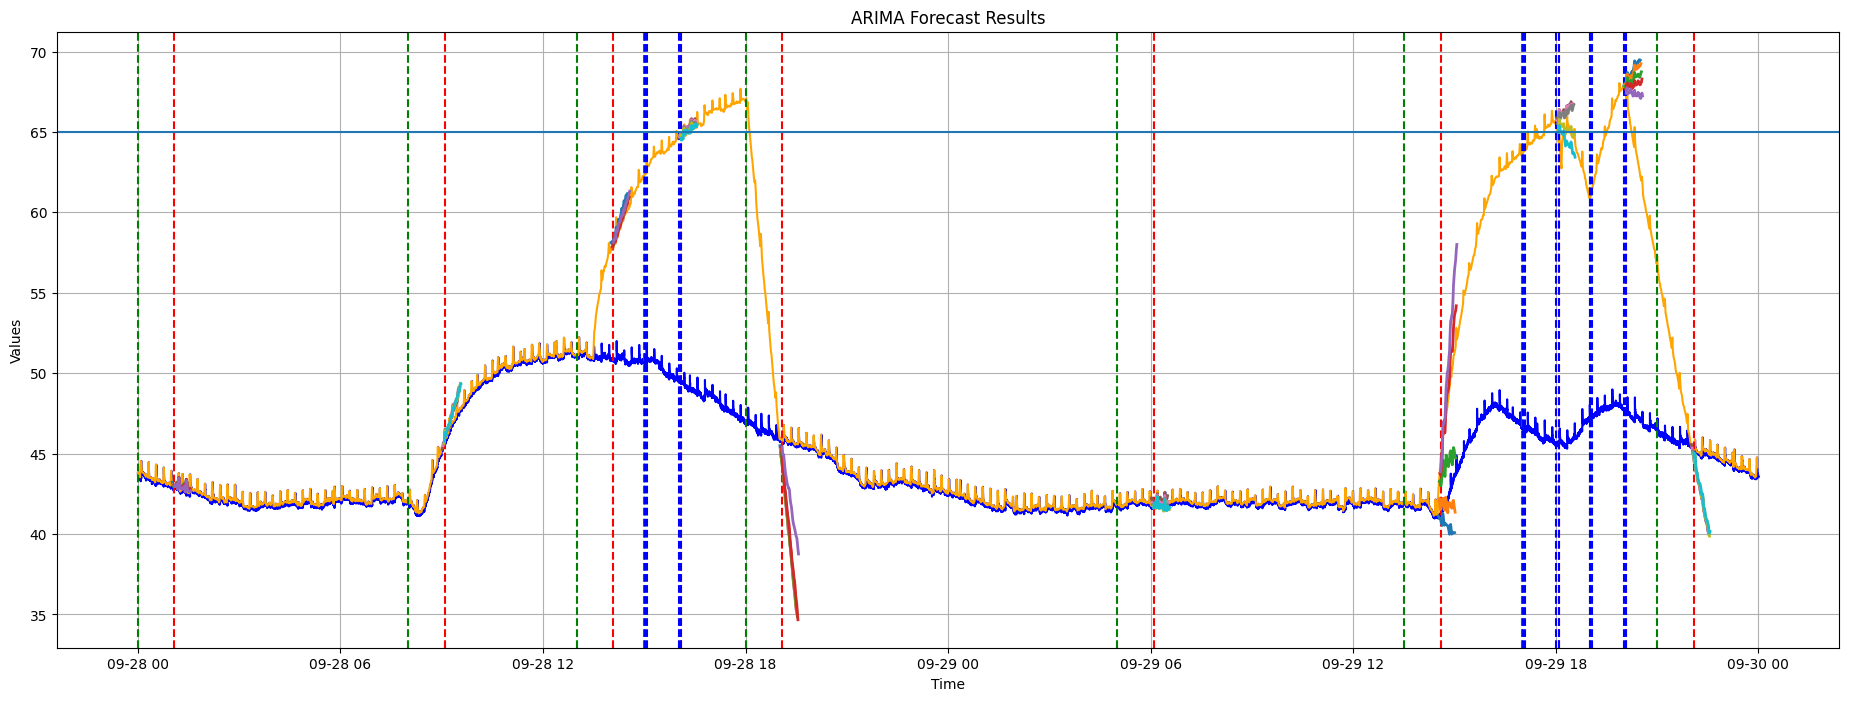

In [66]:
# 그래프 그리기
plt.figure(figsize=(23, 8))
plt.plot(use_df_14.index, use_df_14['_value'], label='use_df_14 (original data)', color='blue')
plt.plot(max_reduced14.index, max_reduced14['_value'], label='max_reduced14 (original data)', color='orange')

# 각 time_range의 시작과 끝에 수직선을 그리기
for start, end in time_ranges:
    start_time = pd.to_datetime(start)
    end_time = pd.to_datetime(end)
    
    # 시작 시간에 수직선
    plt.axvline(x=start_time, color='green', linestyle='--', label=f'Start: {start}')
    # 끝 시간에 수직선
    plt.axvline(x=end_time, color='red', linestyle='--', label=f'End: {end}')

#알람이 울린 구간 확인
for i in selected_indices:
    alarm_time = pd.to_datetime(i)
    plt.axvline(alarm_time, color='blue', linestyle='--')
    plt.axvline(alarm_time - pd.Timedelta(hours=1), color='blue', linestyle='--')  # 1시간 전 시간


# 예측 결과 플로팅
for i, result in enumerate(results):
    forecast_start_time = result.index[0]  # 예측 시작 시간
    forecast_values = result.iloc[0, :-1]  # 예측된 값 (마지막 열은 'alarm'임)
    forecast_index = pd.date_range(start=forecast_start_time, periods=len(forecast_values), freq='T')
    
    plt.plot(forecast_index, forecast_values, label=f'Forecast {i + 1}', linestyle='-', linewidth=2)

plt.axhline(65)
plt.grid()
plt.title('ARIMA Forecast Results')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()


In [67]:
results_df.iloc[:,-1:].to_csv('result/camera_14_result.csv')

## 5번시료

In [46]:
use_df_21 = pd.read_csv('sim/camera_21.csv', parse_dates=['_time'], index_col='_time')
max_reduced21 = use_df_21.resample('60S').max()[:-1]

#### 이상구간 추가 28일 06~15:30   29일 12~19

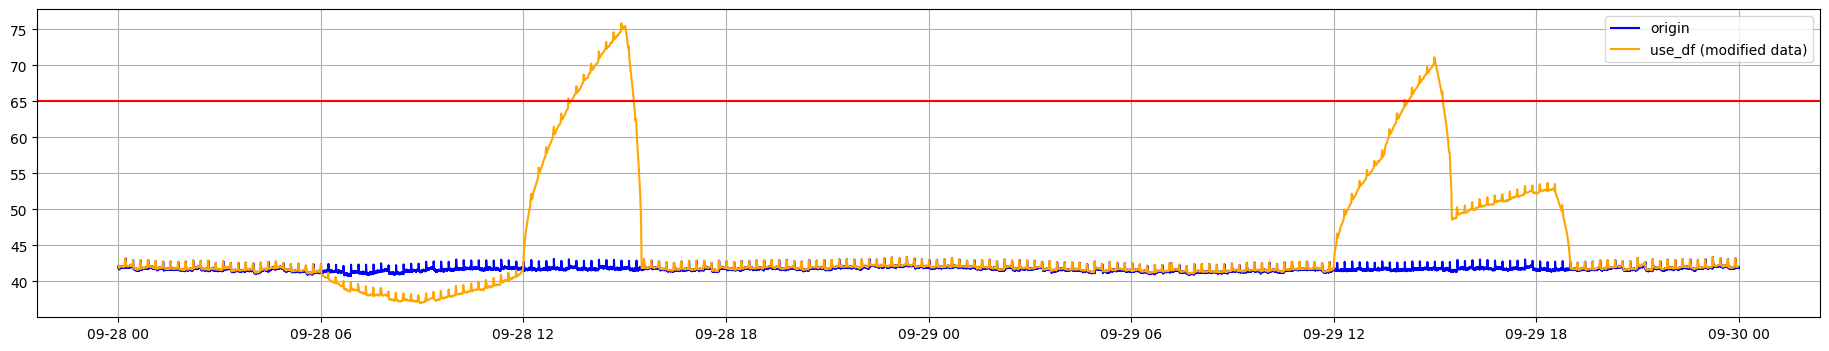

In [48]:
######이상데이터 1
# 첫 번째 구간: 천천히 증가
start_time_1 = '2024-09-28 06:00:00+09:00'
end_time_1 = '2024-09-28 09:00:00+09:00'
selected_data_1 = max_reduced21.loc[start_time_1:end_time_1]
increment_values_1 = np.sqrt(np.linspace(0, 5, len(selected_data_1))) * 2
max_reduced21.loc[start_time_1:end_time_1, '_value'] = selected_data_1['_value'].values - increment_values_1


# 특정 구간에서 값을 자연스럽게 줄이기
adjust_start_time = '2024-09-28 09:01:00+09:00'
adjust_end_time = '2024-09-28 12:00:00+09:00'
selected_adjust_data = max_reduced21.loc[adjust_start_time:adjust_end_time]
# 자연스럽게 줄이기: 선형적으로 줄어들도록 조정
decrement_values = np.sqrt(np.linspace(5, 0, len(selected_adjust_data))) * 2
max_reduced21.loc[adjust_start_time:adjust_end_time, '_value'] = selected_adjust_data['_value'].values - decrement_values

# 첫 번째 구간: 천천히 증가
start_time_1 = '2024-09-28 12:00:00+09:00'
end_time_1 = '2024-09-28 15:00:00+09:00'
selected_data_1 = max_reduced21.loc[start_time_1:end_time_1]
increment_values_1 = np.sqrt(np.linspace(0, 5, len(selected_data_1))) * 15
max_reduced21.loc[start_time_1:end_time_1, '_value'] = selected_data_1['_value'].values + increment_values_1

# 특정 구간에서 값을 자연스럽게 줄이기
adjust_start_time = '2024-09-28 15:01:00+09:00'
adjust_end_time = '2024-09-28 15:30:00+09:00'
selected_adjust_data = max_reduced21.loc[adjust_start_time:adjust_end_time]
# 자연스럽게 줄이기: 선형적으로 줄어들도록 조정
decrement_values = np.sqrt(np.linspace(5, 0, len(selected_adjust_data))) * 15
max_reduced21.loc[adjust_start_time:adjust_end_time, '_value'] = selected_adjust_data['_value'].values + decrement_values


######이상데이터 2
# 첫 번째 구간: 천천히 증가
start_time_1 = '2024-09-29 12:00:00+09:00'
end_time_1 = '2024-09-29 15:00:00+09:00'
selected_data_1 = max_reduced21.loc[start_time_1:end_time_1]
increment_values_1 = np.sqrt(np.linspace(0, 5, len(selected_data_1))) * 10
max_reduced21.loc[start_time_1:end_time_1, '_value'] = selected_data_1['_value'].values + increment_values_1


# 특정 구간에서 값을 자연스럽게 줄이기
adjust_start_time = '2024-09-29 15:01:00+09:00'
adjust_end_time = '2024-09-29 15:30:00+09:00'
selected_adjust_data = max_reduced21.loc[adjust_start_time:adjust_end_time]
# 자연스럽게 줄이기: 선형적으로 줄어들도록 조정
decrement_values = np.sqrt(np.linspace(5, 0, len(selected_adjust_data))) * 10
max_reduced21.loc[adjust_start_time:adjust_end_time, '_value'] = selected_adjust_data['_value'].values + decrement_values

# 첫 번째 구간: 천천히 증가
start_time_1 = '2024-09-29 13:30:00+09:00'
end_time_1 = '2024-09-29 18:30:00+09:00'
selected_data_1 = max_reduced21.loc[start_time_1:end_time_1]
increment_values_1 = np.sqrt(np.linspace(0, 5, len(selected_data_1))) * 5
max_reduced21.loc[start_time_1:end_time_1, '_value'] = selected_data_1['_value'].values + increment_values_1

# 특정 구간에서 값을 자연스럽게 줄이기
adjust_start_time = '2024-09-29 18:31:00+09:00'
adjust_end_time = '2024-09-29 19:00:00+09:00'
selected_adjust_data = max_reduced21.loc[adjust_start_time:adjust_end_time]
# 자연스럽게 줄이기: 선형적으로 줄어들도록 조정
decrement_values = np.sqrt(np.linspace(5, 0, len(selected_adjust_data))) * 5
max_reduced21.loc[adjust_start_time:adjust_end_time, '_value'] = selected_adjust_data['_value'].values + decrement_values



# 결과를 시각화
plt.figure(figsize=(23, 4))
plt.plot(use_df_21.index, use_df_21, label='origin', color='blue')
plt.plot(max_reduced21.index, max_reduced21['_value'], label='use_df (modified data)', color='orange')
plt.axhline(65,color='red')
plt.grid()
plt.legend()
plt.show()


#### Test구간 설정

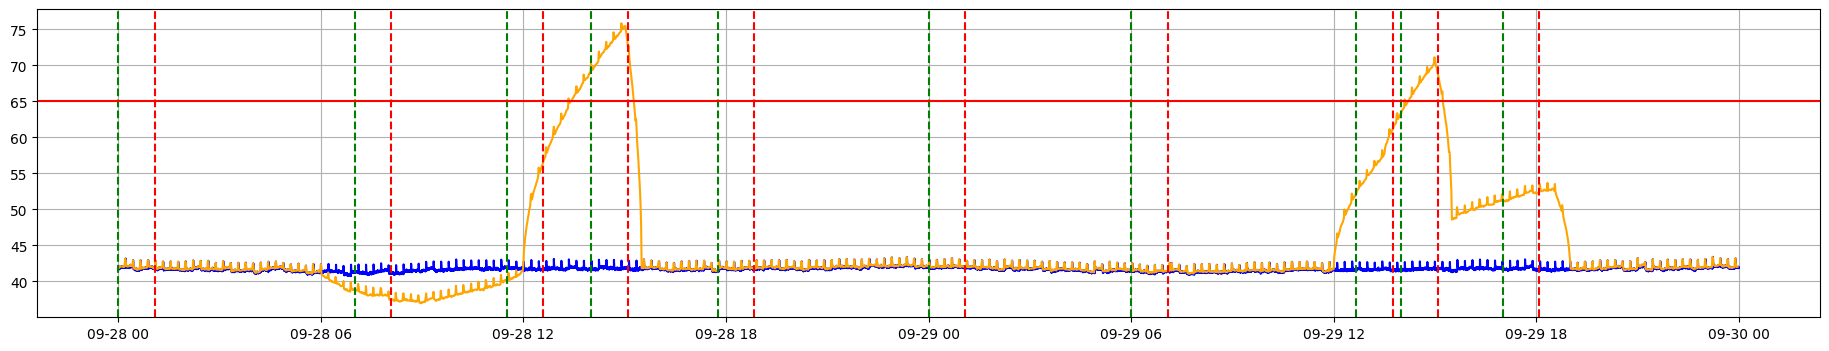

In [49]:
# time_ranges 리스트에 지정된 시간 구간
time_ranges = [
    ('2024-09-28 00:00:00+09:00', '2024-09-28 01:05:00+09:00'),
    ('2024-09-28 07:00:00+09:00', '2024-09-28 08:05:00+09:00'),
    ('2024-09-28 11:30:00+09:00', '2024-09-28 12:35:00+09:00'),
    ('2024-09-28 14:00:00+09:00', '2024-09-28 15:05:00+09:00'),
    ('2024-09-28 17:45:00+09:00', '2024-09-28 18:50:00+09:00'),
    ('2024-09-29 00:00:00+09:00', '2024-09-29 01:05:00+09:00'),
    ('2024-09-29 06:00:00+09:00', '2024-09-29 07:05:00+09:00'),
    ('2024-09-29 12:40:00+09:00', '2024-09-29 13:45:00+09:00'),
    ('2024-09-29 14:00:00+09:00', '2024-09-29 15:05:00+09:00'),
    ('2024-09-29 17:00:00+09:00', '2024-09-29 18:05:00+09:00'),
]


# 그래프 그리기
plt.figure(figsize=(23, 4))
plt.plot(use_df_21.index, use_df_21['_value'], label='use_df_21 (original data)', color='blue')
plt.plot(max_reduced21.index, max_reduced21['_value'], label='use_df (original data)', color='orange')

# 각 time_range의 시작과 끝에 수직선을 그리기
for start, end in time_ranges:
    start_time = pd.to_datetime(start)
    end_time = pd.to_datetime(end)
    
    # 시작 시간에 수직선
    plt.axvline(x=start_time, color='green', linestyle='--', label=f'Start: {start}')
    # 끝 시간에 수직선
    plt.axvline(x=end_time, color='red', linestyle='--', label=f'End: {end}')
plt.axhline(65,color='red')
plt.grid()
plt.show()

#### Test기간 5분씩 테스트 후 알람확인

In [50]:
## 평지구간 5개, 증가구간 5개(3개만 알람되야함)

In [51]:
results = []

# 각 시간 범위에 대해 슬라이딩 예측 수행
for time_range in time_ranges:
    start_time, end_time = time_range
    start_time = pd.Timestamp(start_time)
    
    # 5번의 슬라이딩 예측 수행
    for i in range(5):  # 총 5번 예측
        train_start = start_time + pd.Timedelta(minutes=i)  # 시작 시간
        train_end = train_start + pd.Timedelta(hours=1)  # 1시간 후
        
        train_window = max_reduced21.loc[train_start:train_end]  # 해당 시간 구간의 데이터
        
        # ARIMA 모델 학습
        model = ARIMA(train_window, order=(12, 2, 6))
        model_fit = model.fit()
        
        # 30분 예측
        forecast = model_fit.forecast(steps=30)
        forecast_df = pd.DataFrame(forecast)
        forecast_transpose = forecast_df.T
        forecast_transpose.index = [forecast_transpose.columns[0]]
        forecast_transpose.columns = range(len(forecast_transpose.columns))
        forecast_transpose['alarm'] = (forecast_transpose.iloc[0] > 65).any()
        
        results.append(forecast_transpose)

# 결과를 하나의 데이터프레임으로 합치기
results_df = pd.concat(results)
# final_alarm 열 생성
results_df['final_alarm'] = False

# 시간대 그룹핑 및 final_alarm 업데이트
time_bins = pd.date_range(start=results_df.index.min(), end=results_df.index.max(), freq='5T')  # 5분 단위로 그룹핑
for start_time in time_bins:
    end_time = start_time + pd.Timedelta(minutes=5)
    mask = (results_df.index >= start_time) & (results_df.index < end_time)
    
    if mask.any():  # 그룹에 데이터가 있는 경우
        if results_df.loc[mask, 'alarm'].all():  # 모든 alarm이 True인 경우
            results_df.loc[mask, 'final_alarm'] = True

selected_indices = results_df[results_df['final_alarm']==True].index[(results_df[results_df['final_alarm']==True]['final_alarm'] == True) & ((results_df[results_df['final_alarm']==True].index.minute % 10 == 1) | (results_df[results_df['final_alarm']==True].index.minute % 10 == 5))]
selected_indices

DatetimeIndex(['2024-09-28 15:01:00+09:00', '2024-09-28 15:05:00+09:00',
               '2024-09-29 13:41:00+09:00', '2024-09-29 13:45:00+09:00',
               '2024-09-29 15:01:00+09:00', '2024-09-29 15:05:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq=None)

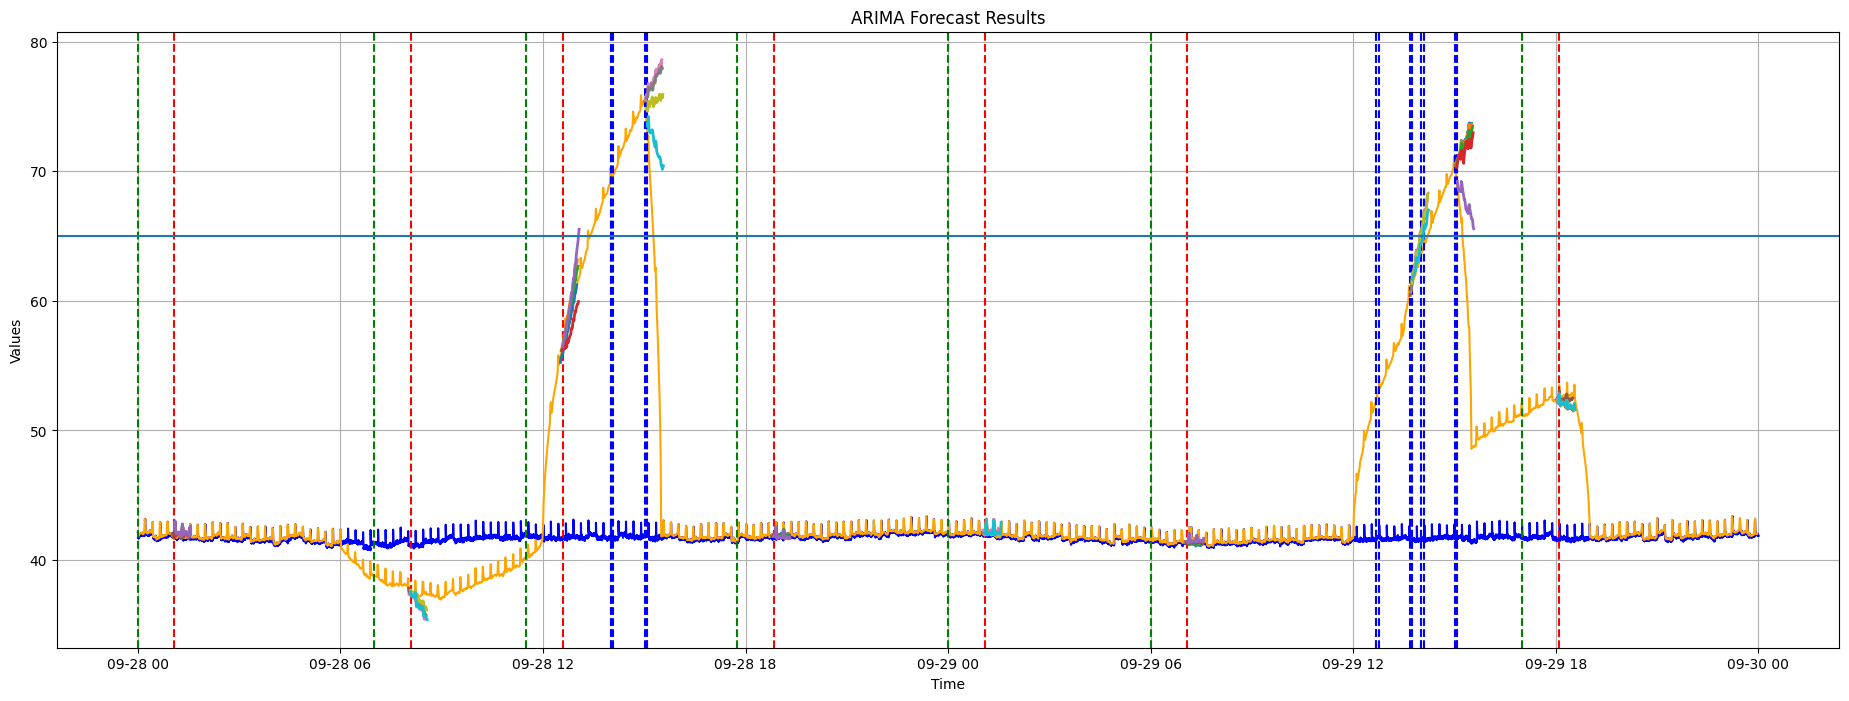

In [52]:
# 그래프 그리기
plt.figure(figsize=(23, 8))
plt.plot(use_df_21.index, use_df_21['_value'], label='use_df_21 (original data)', color='blue')
plt.plot(max_reduced21.index, max_reduced21['_value'], label='max_reduced21 (original data)', color='orange')

# 각 time_range의 시작과 끝에 수직선을 그리기
for start, end in time_ranges:
    start_time = pd.to_datetime(start)
    end_time = pd.to_datetime(end)
    
    # 시작 시간에 수직선
    plt.axvline(x=start_time, color='green', linestyle='--', label=f'Start: {start}')
    # 끝 시간에 수직선
    plt.axvline(x=end_time, color='red', linestyle='--', label=f'End: {end}')

#알람이 울린 구간 확인
for i in selected_indices:
    alarm_time = pd.to_datetime(i)
    plt.axvline(alarm_time, color='blue', linestyle='--')
    plt.axvline(alarm_time - pd.Timedelta(hours=1), color='blue', linestyle='--')  # 1시간 전 시간


# 예측 결과 플로팅
for i, result in enumerate(results):
    forecast_start_time = result.index[0]  # 예측 시작 시간
    forecast_values = result.iloc[0, :-1]  # 예측된 값 (마지막 열은 'alarm'임)
    forecast_index = pd.date_range(start=forecast_start_time, periods=len(forecast_values), freq='T')
    
    plt.plot(forecast_index, forecast_values, label=f'Forecast {i + 1}', linestyle='-', linewidth=2)

plt.axhline(65)
plt.grid()
plt.title('ARIMA Forecast Results')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()


In [53]:
results_df.iloc[:,-1:].to_csv('camera_21_result.csv')